In [96]:
!pip install xgboost
!pip install catboost

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [84]:
classification_data = pd.read_csv('data/phish_data.csv')

In [85]:
x = classification_data.iloc[:,:-1]
x

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [86]:
y = classification_data.iloc[:,-1]
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [88]:
x_train.shape

(8291, 30)

In [89]:
x_test.shape

(2764, 30)

In [103]:
def train_model_classification(models, x_train, x_test, y_train, y_test):
    model_names = []
    model_accuracy = []
    model_precision = []
    model_recall = []
    model_f1 = []
    for model in range(len(models)):   
        classifier = models[model]
        model_name = type(classifier).__name__
        model_names.append(model_name)
        if model_name == 'XGBClassifier' or model_name == 'CatBoostClassifier':
            le = LabelEncoder()
            classifier.fit(x_train, le.fit_transform(y_train))
        else:
            classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = round(accuracy_score(y_test, y_pred),2)
        precision = round(precision_score(y_test, y_pred, average='micro'),2)
        recall = round(recall_score(y_test, y_pred, average='micro'),2)
        f1 = round(f1_score(y_test, y_pred, average='micro'),2)
        cr = classification_report(y_test, y_pred)
        model_accuracy.append(accuracy)
        model_precision.append(precision)
        model_recall.append(recall)
        model_f1.append(f1)
        print(f"{'-'*30} {model_name} {'-'*30}")
        print("Accuracy Score : {:.4f}".format(accuracy))
        print("Precision Score : {:.4f}".format(precision))
        print("Recall Score : {:.4f}".format(recall))
        print("F1 Score : {:.4f}".format(f1))
        print(f'Classification_report : {cr}')
        confusion_mat = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
        cm_display.plot()
        plt.title(f'{model_name} confusion matrix')
        plt.show()
        print('*'*80)

    result_df = pd.DataFrame(list(zip(model_names, model_accuracy, model_precision, model_recall, model_f1)), \
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) 

    return result_df       

In [106]:
classification_models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB(), DecisionTreeClassifier()]


------------------------------ LogisticRegression ------------------------------
Accuracy Score : 0.9200
Precision Score : 0.9200
Recall Score : 0.9200
F1 Score : 0.9200
Classification_report :               precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1249
           1       0.92      0.94      0.93      1515

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



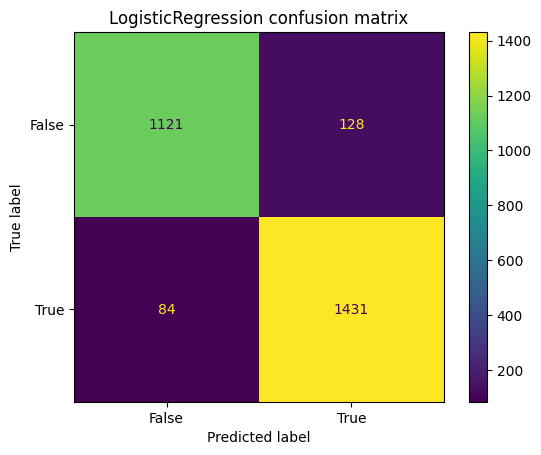

********************************************************************************
------------------------------ KNeighborsClassifier ------------------------------
Accuracy Score : 0.9400
Precision Score : 0.9400
Recall Score : 0.9400
F1 Score : 0.9400
Classification_report :               precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1249
           1       0.93      0.96      0.94      1515

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



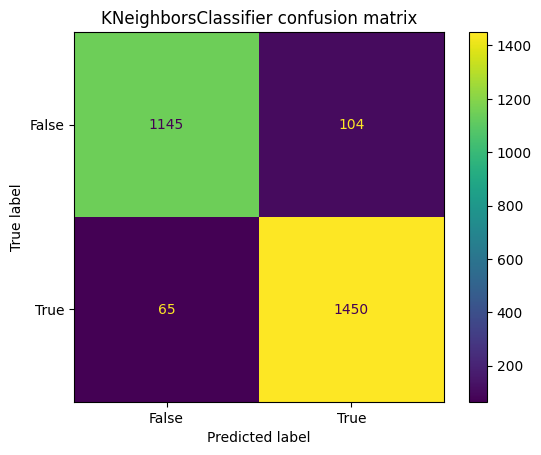

********************************************************************************
------------------------------ RandomForestClassifier ------------------------------
Accuracy Score : 0.9700
Precision Score : 0.9700
Recall Score : 0.9700
F1 Score : 0.9700
Classification_report :               precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1249
           1       0.96      0.99      0.97      1515

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



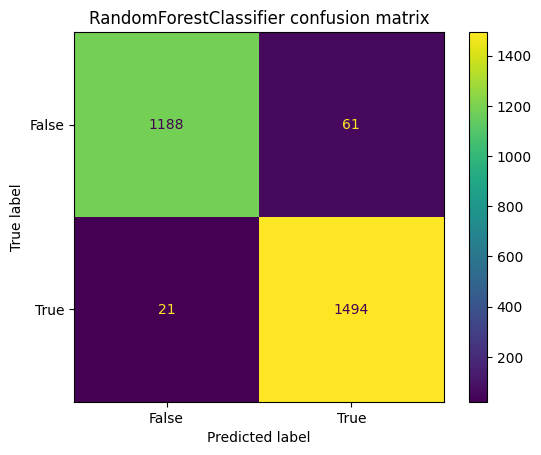

********************************************************************************
------------------------------ SVC ------------------------------
Accuracy Score : 0.9400
Precision Score : 0.9400
Recall Score : 0.9400
F1 Score : 0.9400
Classification_report :               precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1249
           1       0.94      0.96      0.95      1515

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



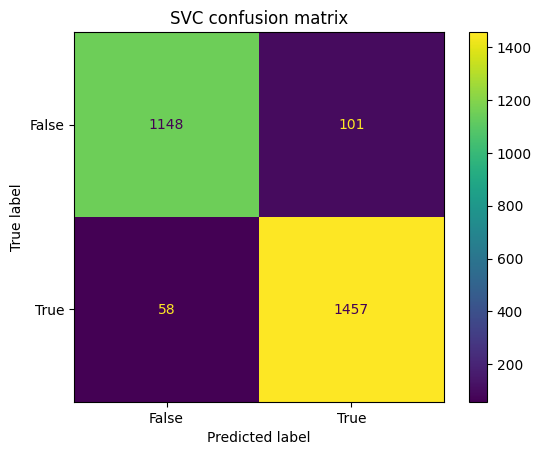

********************************************************************************
------------------------------ DecisionTreeClassifier ------------------------------
Accuracy Score : 0.9600
Precision Score : 0.9600
Recall Score : 0.9600
F1 Score : 0.9600
Classification_report :               precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1249
           1       0.96      0.97      0.97      1515

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



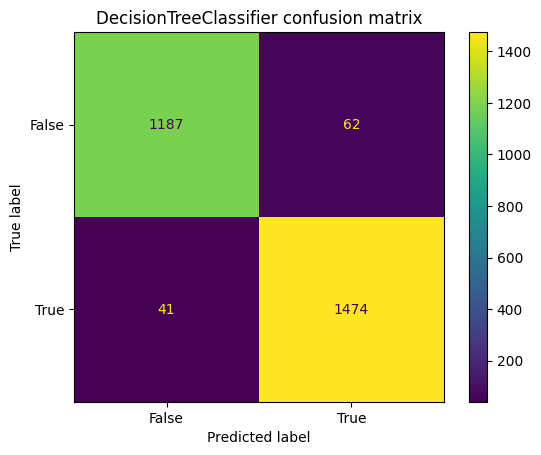

********************************************************************************
------------------------------ GaussianNB ------------------------------
Accuracy Score : 0.6100
Precision Score : 0.6100
Recall Score : 0.6100
F1 Score : 0.6100
Classification_report :               precision    recall  f1-score   support

          -1       0.54      1.00      0.70      1249
           1       1.00      0.29      0.45      1515

    accuracy                           0.61      2764
   macro avg       0.77      0.65      0.58      2764
weighted avg       0.79      0.61      0.56      2764



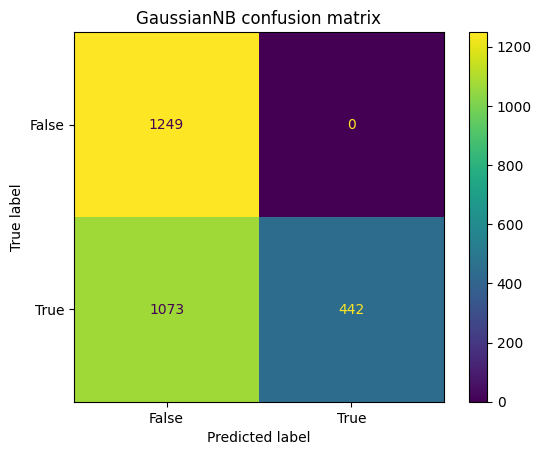

********************************************************************************
------------------------------ DecisionTreeClassifier ------------------------------
Accuracy Score : 0.9600
Precision Score : 0.9600
Recall Score : 0.9600
F1 Score : 0.9600
Classification_report :               precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1249
           1       0.96      0.97      0.96      1515

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



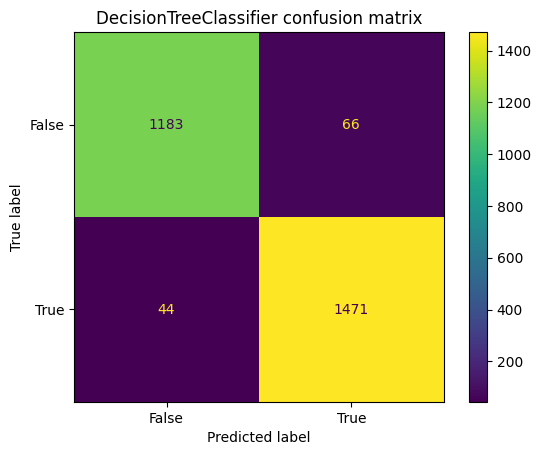

********************************************************************************


In [107]:
model_results = train_model_classification(models = classification_models, x_train=x_train, x_test = x_test, y_train = y_train, y_test=y_test)


In [108]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.92,0.92,0.92,0.92
1,KNeighborsClassifier,0.94,0.94,0.94,0.94
2,RandomForestClassifier,0.97,0.97,0.97,0.97
3,SVC,0.94,0.94,0.94,0.94
4,DecisionTreeClassifier,0.96,0.96,0.96,0.96
5,GaussianNB,0.61,0.61,0.61,0.61
6,DecisionTreeClassifier,0.96,0.96,0.96,0.96


In [109]:
xgbc = XGBClassifier()

In [111]:
le = LabelEncoder()

In [118]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [113]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [119]:
y_prob = xgbc.predict(x_test)

In [120]:
accuracy_score(y_test, y_prob)

0.967438494934877

In [121]:
cbc = CatBoostClassifier(task_type="GPU",devices='0:1')

In [122]:
le = LabelEncoder()

In [123]:
cbc.fit(x_train, y_train)

Learning rate set to 0.030009
0:	learn: 0.6370941	total: 54ms	remaining: 53.9s
1:	learn: 0.5855500	total: 92.1ms	remaining: 46s
2:	learn: 0.5421793	total: 125ms	remaining: 41.5s
3:	learn: 0.5010517	total: 158ms	remaining: 39.2s
4:	learn: 0.4640600	total: 198ms	remaining: 39.5s
5:	learn: 0.4324340	total: 236ms	remaining: 39s
6:	learn: 0.4055464	total: 269ms	remaining: 38.2s
7:	learn: 0.3825304	total: 302ms	remaining: 37.5s
8:	learn: 0.3660575	total: 334ms	remaining: 36.8s
9:	learn: 0.3480646	total: 368ms	remaining: 36.4s
10:	learn: 0.3321463	total: 396ms	remaining: 35.6s
11:	learn: 0.3172156	total: 429ms	remaining: 35.3s
12:	learn: 0.3037582	total: 456ms	remaining: 34.6s
13:	learn: 0.2928050	total: 493ms	remaining: 34.7s
14:	learn: 0.2816887	total: 528ms	remaining: 34.7s
15:	learn: 0.2716375	total: 563ms	remaining: 34.6s
16:	learn: 0.2616852	total: 594ms	remaining: 34.3s
17:	learn: 0.2548228	total: 633ms	remaining: 34.5s
18:	learn: 0.2486281	total: 663ms	remaining: 34.2s
19:	learn: 0.24

In [126]:
y_prob = cbc.predict(x_test)

In [127]:
accuracy_score(y_test, y_prob)

0.9605643994211288

In [129]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [130]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [131]:
y_pred = mlp_clf.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.96


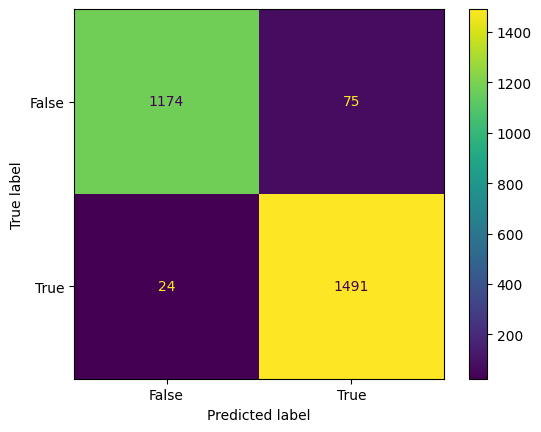

In [132]:
confusion_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()